In [3]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy
import pandas as pd
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models
from tqdm import tqdm
%matplotlib inline

In [16]:
df = pd.read_csv("war-news.csv", encoding="ISO-8859-1")
tokens = df["Headlines"].values.tolist()

nlp = spacy.load("en_core_web_sm")

cleaned_tokens=[]

for token in tqdm(tokens):
    text = []
    doc = nlp(token)
    for w in doc:
        text.append(w.lemma_) if not w.is_stop and not w.is_punct and not w.like_num else None
    cleaned_tokens.append(text)

100%|██████████| 5653/5653 [00:32<00:00, 174.77it/s]


In [17]:
bigram = gensim.models.Phrases(cleaned_tokens)
texts = [bigram[line] for line in cleaned_tokens]
print(texts[10:50])

[['new', 'life', 'new', 'struggle', 'Afghans', 'adjust'], ['war', 'Forever', 'War', 'Legal', 'Paradigm', 'Afghanistan'], ['Afghan_War'], ['war', 'Ukraine', 'exacerbate', 'food_insecurity'], ['time', 'Disengage', 'Afghanistan', 'War'], ['Taliban', 'division', 'deepen', 'afghan', 'woman', 'defy', 'veil', 'edict'], ['witness', 'back', 'Ben', 'Roberts', 'Smith', 'claim', 'afghan', 'insurgent', 'lawful', '\n', 'death'], ['India', 'Italy', 'talk', 'Afghanistan', 'situation', 'Ukraine', 'war', 'ï¿½', 'Pajhwok'], ['analysis_|', 'Russia', 'right', 'U.S.', 'wage', 'Proxy', 'War'], ['Afghanistan', 'nearly', 'go', 'hungry', '|', '|', 'UN', 'News'], ['Russia_Ukraine', 'war', 'meet', 'afghan', 'refugee', 'fight'], ['New', 'York', 'Times', 'win', 'Pulitzer', 'Prizes', 'Reuters', 'win', 'feature', 'photography'], ['Imran_Khan', 'coup', 'theory', 'popular', 'Pakistan'], ['Red_Cross', 'chief', 'Iran', 'visit_talk', 'Afghans_plight'], ['war', 'terror', 'dent', 'Pak', 'afghan', 'trade'], ['want', 'meet', 

In [18]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(0, 1), (1, 1), (8, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(0, 1), (1, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(8, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(1, 1), (8, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(1, 1), (36, 1)], [(0, 1), (1, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(1, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(8, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(8, 1), (51, 1), (52, 1), (53, 1)]]


In [19]:
lsimodel = LsiModel(corpus=corpus, id2word=dictionary)
lsimodel.show_topics(num_topics=5)

c:\Users\tr3h2\AppData\Local\Programs\Python\Python311\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\tr3h2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\tr3h2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\tr3h2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\li

[(0,
  '0.838*"war" + 0.360*"Ukraine" + 0.247*"\n" + 0.138*"Russia" + 0.082*"India" + 0.080*"Iran" + 0.079*"Russia_Ukraine" + 0.078*"War" + 0.077*"Israel" + 0.072*"China"'),
 (1,
  '-0.556*"War" + -0.477*"Ukraine" + 0.459*"war" + -0.382*"\n" + -0.226*"Russia" + -0.104*"China" + -0.103*"India" + -0.055*"say" + -0.039*"Putin" + -0.037*"military"'),
 (2,
  '-0.737*"\n" + 0.589*"Ukraine" + 0.179*"Russia" + -0.083*"say" + -0.083*"Russia_Ukraine" + -0.082*"ï¿½" + -0.081*"Afghanistan" + -0.057*"year" + -0.055*"conflict" + -0.049*"Vietnam_War"'),
 (3,
  '-0.744*"War" + 0.395*"\n" + 0.337*"Ukraine" + -0.184*"Iran" + 0.168*"Russia" + -0.156*"war" + -0.144*"Russia_Ukraine" + -0.112*"Afghanistan" + -0.097*"Israel" + -0.064*"year"'),
 (4,
  '0.570*"Russia" + 0.502*"Iran" + 0.424*"Israel" + -0.215*"Ukraine" + 0.209*"China" + -0.150*"War" + 0.123*"say" + 0.113*"U.S." + -0.100*"Afghanistan" + 0.091*"military"')]

In [9]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.show_topics()

[(0,
  '0.002*war + 0.001*ratio + 0.001*Ukraine + 0.001*equality + 0.001*Russia + 0.001*Akuna + 0.001*xenophobe + 0.001*Grenke + 0.001*body + 0.001*Battleground + 0.001*crossfire + 0.001*ï¿½No + 0.001*Troop + 0.001*opposition + 0.001*Report + 0.001*Levels + 0.001*Mobilization + 0.001*condemn + 0.001*record + 0.001*\n'),
 (1,
  '0.002*war + 0.001*century + 0.001*\n + 0.001*hainan + 0.001*Ukraine + 0.001*smuggler + 0.001*stability + 0.001*Pic + 0.001*Zayed + 0.001*need + 0.001*maker + 0.001*Chinaï¿½s + 0.001*Tells + 0.001*tally + 0.001*happy + 0.001*context + 0.001*War + 0.001*respectï¿½ + 0.001*Awakening + 0.001*Matt'),
 (2,
  '0.001*mistake + 0.001*neo + 0.001*Nationals + 0.001*Search + 0.001*Chasing + 0.001*surpass + 0.001*war + 0.001*Africaï¿½s + 0.001*carrier + 0.001*engineering + 0.001*raise + 0.001*Implicit + 0.001*define + 0.001*crypto + 0.001*Nicolas + 0.001*Frederick + 0.001*Hifterï¿½s + 0.001*yawn + 0.001*forcibly + 0.001*ï¿½Babushka'),
 (3,
  '0.002*war + 0.001*Pakistanis + 0

In [10]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
ldamodel.show_topics()

[(0,
  '0.052*"war" + 0.041*"Syria" + 0.027*"Lebanon" + 0.024*"Libya" + 0.023*"Israel" + 0.020*"Venezuela" + 0.015*"Ukraine" + 0.013*"War" + 0.011*"Yemen" + 0.009*"Iran"'),
 (1,
  '0.023*"war" + 0.018*"Vietnam" + 0.017*"Ukraine" + 0.012*"Russia" + 0.011*"World" + 0.010*"War" + 0.010*"\n" + 0.009*"headline" + 0.008*"aid" + 0.008*"War_Crimes"'),
 (2,
  '0.055*"war" + 0.038*"Yemen" + 0.025*"Russia_Ukraine" + 0.018*"conflict" + 0.014*"\n" + 0.011*"civil_war" + 0.009*"War" + 0.008*"happen_today" + 0.008*"April" + 0.007*"invasion"'),
 (3,
  '0.032*"war" + 0.032*"War" + 0.019*"Yemen" + 0.016*"israeli" + 0.014*"Venezuela" + 0.011*"Ukraine" + 0.010*"\n" + 0.008*"Israel" + 0.007*"Russia_Ukraine" + 0.007*"force"'),
 (4,
  '0.033*"war" + 0.022*"Libya" + 0.015*"civil_war" + 0.013*"Russia" + 0.013*"\n" + 0.013*"war_crime" + 0.013*"Ukraine" + 0.012*"return" + 0.011*"Israel" + 0.008*"child"'),
 (5,
  '0.054*"Venezuela" + 0.031*"Ukraine" + 0.028*"U.S." + 0.026*"War" + 0.016*"Maduro" + 0.014*"war" + 0.0

In [11]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [12]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tokens)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(tokens)
tf_feature_names = tf_vectorizer.get_feature_names_out()

no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
ukraine russia war invasion russian happened updates putin day news
Topic 1:
war iraq iran afghanistan yemen france nigeria years says algeria
Topic 2:
sudan south civil conflict war crisis crimes peace food report
Topic 3:
israel palestine conflict lebanon palestinian iran gaza israeli hezbollah palestinians
Topic 4:
india pakistan 1971 war conflict khan kashmir imran won says
Topic 5:
vietnam war veterans veteran day afghanistan memorial national honored news
Topic 6:
libya civil war syria years crimes turkey warns new intervention
Topic 7:
½s russiaï indiaï chinaï israelï nigeriaï war new pakistanï warï
Topic 8:
china military taiwan war says cold new risk india relations
Topic 9:
venezuela cuba crisis maduro oil economic colombia border war trump
Topic 0:
day battle happened 000 uk ukrainian trump forces national justice
Topic 1:
india libya russian amid food military iran envoy state europe
Topic 2:
½s war venezuela sudan south crisis cuba civil news america
Topic 3:
paki

In [13]:
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)

pyLDAvis.display(vis)

In [14]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

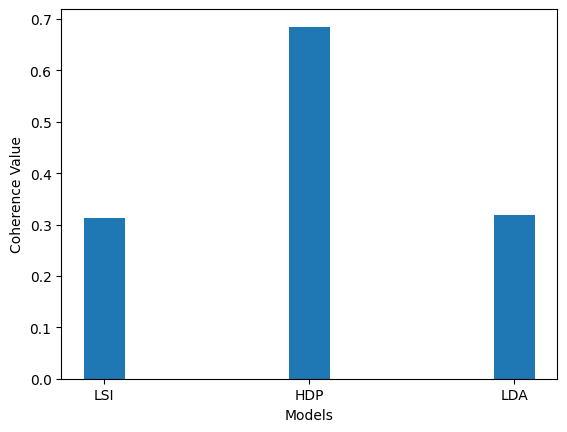

In [15]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
['LSI', 'HDP', 'LDA'])